In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable
from tqdm.notebook import tqdm, trange

from desiutil.dust import mwdust_transmission, ext_odonnell
from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [8]:
sv1 = atable.Table.read(os.path.join(dat_dir, 'ztile-sv1-bright-cumulative.fits'))
sv3 = atable.Table.read(os.path.join(dat_dir, 'ztile-sv3-bright-cumulative.fits'))

In [10]:
sv1_bright = (sv1['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_faint  = (sv1['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0 

sv3_bright = (sv3['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_faint  = (sv3['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

In [11]:
sv1_cuts = ((sv1['Z'] != 1e20) & (sv1['ZWARN'] == 0) & (sv1['DELTACHI2'] > 15))
sv3_cuts = ((sv3['Z'] != 1e20) & (sv3['ZWARN'] == 0) & (sv3['DELTACHI2'] > 15))

In [12]:
print('SV1: %i redshifts' % np.sum(sv1_cuts))
print('SV3: %i redshifts' % np.sum(sv3_cuts))

SV1: 169094 redshifts
SV3: 760868 redshifts


In [24]:
def stephist(nh, _edges):
    bin_edges = np.sort(list(_edges) + list(_edges[1:-1]))
    return bin_edges, np.array([[x, x] for x in nh]).flatten()

(0.0, 27000.0)

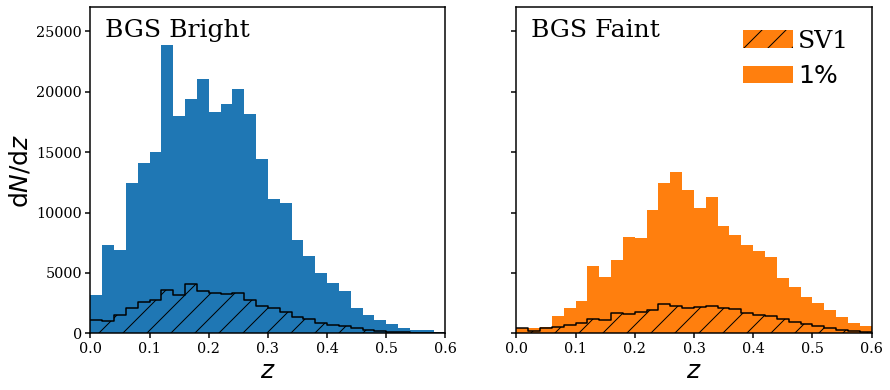

In [56]:
fig = plt.figure(figsize=(14,6))
sub = fig.add_subplot(121)

nh, edges = np.histogram(sv1['Z'][sv1_bright & sv1_cuts], range=(0., 0.6), bins=30)
bin_edges, nhist0 = stephist(nh, edges)

sub.fill_between(bin_edges, np.zeros(len(bin_edges)), nhist0, facecolor='C0', hatch='/')
sub.plot(bin_edges, nhist0, c='k')

nh, edges = np.histogram(sv3['Z'][sv3_bright & sv3_cuts], range=(0., 0.6), bins=30)
bin_edges, nhist1 = stephist(nh, edges)

sub.fill_between(bin_edges, nhist, nhist0 + nhist1, facecolor='C0')

sub.text(0.025, 2.6e4, 'BGS Bright', ha='left', va='top', fontsize=25)
sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.6)
sub.set_ylabel(r'${\rm d}N/{\rm d}z$', fontsize=25)
sub.set_ylim(0., 2.7e4)

sub = fig.add_subplot(122)

nh, edges = np.histogram(sv1['Z'][sv1_faint & sv1_cuts], range=(0., 0.6), bins=30)
bin_edges, nhist0 = stephist(nh, edges)

sub.fill_between(bin_edges, np.zeros(len(bin_edges)), nhist0, facecolor='C1', hatch='/', label='SV1')
sub.plot(bin_edges, nhist0, c='k')

nh, edges = np.histogram(sv3['Z'][sv3_faint & sv3_cuts], range=(0., 0.6), bins=30)
bin_edges, nhist1 = stephist(nh, edges)

sub.fill_between(bin_edges, nhist0, nhist1, facecolor='C1', label=r'$1\%$')

sub.text(0.025, 2.6e4, 'BGS Faint', ha='left', va='top', fontsize=25)
sub.legend(loc='upper right', handletextpad=0.2, fontsize=25)
sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.6)
sub.set_yticklabels([])
sub.set_ylim(0., 2.7e4)

(0.0, 0.6)

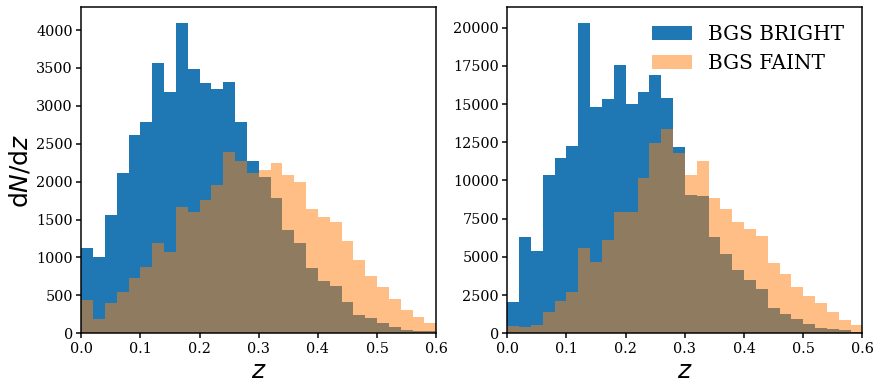

In [14]:
fig = plt.figure(figsize=(16, 6))
sub = fig.add_subplot(121)
_ = sub.hist(bgs['Z'][is_bright & cuts], range=(0., 0.8), bins=30, density=True, histtype='stepfilled', label='BGS BRIGHT')
_ = sub.hist(mxxl['z_obs'][...][mxxl['app_mag'][...] < 19.5], range=(0., 0.8), bins=30, density=True, histtype='step', color='k', linestyle='--', label='MXXL $r < 19.5$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.8)
sub.set_ylabel(r'${\rm d}N/{\rm d}z/N$', fontsize=25)
sub.set_ylim(0., 5.)

sub = fig.add_subplot(122)
_ = sub.hist(bgs['Z'][is_faint & cuts], range=(0., 0.8), bins=30, density=True, histtype='stepfilled', color='C1', label='BGS FAINT')
_ = sub.hist(mxxl['z_obs'][...][(mxxl['app_mag'][...] > 19.5) & (mxxl['app_mag'][...] < 20.0)], range=(0., 0.8), bins=30, density=True, histtype='step', color='k', linestyle='--', label='MXXL $19.5 < r < 20.0$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.8)
sub.set_ylim(0., 5.)